In [ ]:
# @title
#%pip install minisom
#%pip install scikit-metrics
from IPython.display import Image, display
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve

In [ ]:
# load data
dataset = load_breast_cancer()

In [ ]:
target = dataset.target
target_names = dataset.target_names
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data.index.name = "Sample ID"

In [ ]:
# visualize data
pd.set_option('display.max_columns', None)
print('gene expressions')
display(data.head())
print(data.shape)
print('\ntarget key')
display(pd.DataFrame(target_names).head())
print('\nclassification')
display(pd.DataFrame(target).head())

gene expressions


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30)

target key


,0
0,malignant
1,benign



classification


,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, target)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

#normalizing the data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training set has 426 samples.
Testing set has 143 samples.


In [ ]:
# function to evaluate the map classifier using different metrics
def evaluate(som, y_test, y_pred):

    acc = accuracy_score(y_test, y_pred)
    perf = precision_recall_fscore_support(y_test, y_pred, average = 'macro')
    print("Accuracy: ", acc)
    print(f"Precision : {perf[0]:.4f} Recall : {perf[1]:.4f} Fscore : {perf[2]:.4f}")

In [ ]:
# since this in supervised classification not unsupervised, this function chooses the class of
# the BMU to be the final class of each instance
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [ ]:
# set hyperparameters
x = 16
y = 16
input_len = X_train.shape[1]
sigma = 1.2222222222222223
learning_rate = 1.7777777777777777
iterations = 1000

In [ ]:
somClassifier = MiniSom(x,y, input_len, sigma=sigma*16/13, learning_rate=learning_rate*16/13)
somClassifier.random_weights_init(X_train)
somClassifier.train_random(X_train, iterations)

In [ ]:
print('Quantization Error for the classifier with mexican_hat neiborhood is ', somClassifier.quantization_error(X_train))
print('Topographic Error for the classifier with mexican_hat neiborhood is ', somClassifier.topographic_error(X_train))
print()
y_pred = classify(somClassifier, X_test)
evaluate(somClassifier, y_test, y_pred)

Quantization Error for the classifier with mexican_hat neiborhood is  0.23690128543213845
Topographic Error for the classifier with mexican_hat neiborhood is  0.2863849765258216

Accuracy:  0.958041958041958
Precision : 0.9706 Recall : 0.9362 Fscore : 0.9508


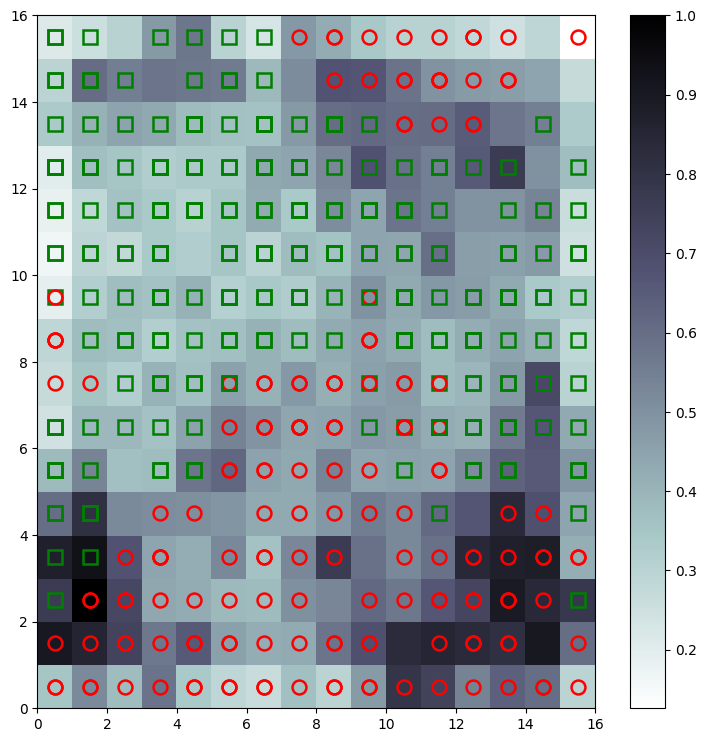

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(somClassifier.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's']
colors = ['r', 'g']
for cnt, xx in enumerate(X_train):
    w = somClassifier.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[y_train[cnt]], markerfacecolor="None",
             markeredgecolor=colors[y_train[cnt]], markersize=10, markeredgewidth=1.8)

plt.show()

In [ ]:
somClassifier2 = MiniSom(x,y, input_len, sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian',)
somClassifier2.random_weights_init(X_train)
somClassifier2.train_random(X_train, iterations)

In [ ]:
print('Quantization Error for the classifier with gaussian neiborhood is: ', somClassifier2.quantization_error(X_train))
print('Topographic Error or the classifier with gaussian neiborhood is: ', somClassifier2.topographic_error(X_train))
print()
y_pred = classify(somClassifier2, X_test)
evaluate(somClassifier2, y_test, y_pred)

Quantization Error for the classifier with gaussian neiborhood is:  0.21274416624841008
Topographic Error or the classifier with gaussian neiborhood is:  0.31690140845070425

Accuracy:  0.9020979020979021
Precision : 0.8891 Recall : 0.8891 Fscore : 0.8891


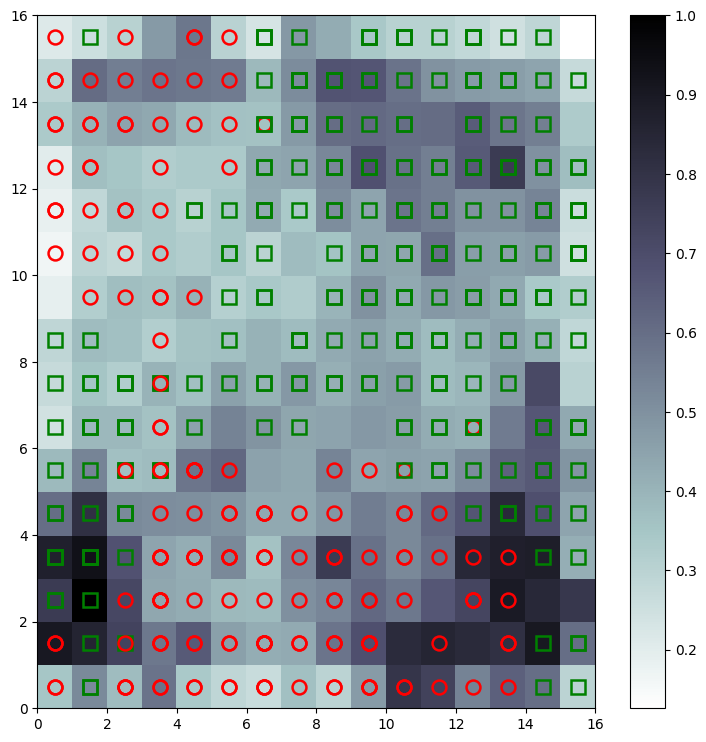

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(somClassifier.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's']
colors = ['r', 'g']
for cnt, xx in enumerate(X_train):
    w = somClassifier2.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[y_train[cnt]], markerfacecolor="None",
             markeredgecolor=colors[y_train[cnt]], markersize=10, markeredgewidth=1.8)

plt.show()